<a href="https://colab.research.google.com/github/BLITBLAZERS/PHISHGUARDIAN/blob/main/Phishing%20Url%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHISGUARDIAN
PROJECT ON PHISHING URLs DETECTION




## 1. Objective: Developing a Phishing Domain Detection Tool
Develop a tool for detecting phishing domains. Collect data from WHOIS and reliable sources, preprocess it, and extract features. Utilize machine learning, NLP, and computer vision to analyze domains and calculate probability scores. Continuously monitor new domains, automate analysis, and report results via a user-friendly interface. Ensure security, privacy, and ongoing support while evaluating performance for accuracy and speed.

## 2. Data Collection -
We have acquired data from the reputable source,

 https://www.unb.ca/cic/datasets/url-2016.html.

 Our dataset comprises two key components: a phishing csv file containing 10,000 phishing URLs and a comprehensive benign csv file with 35,000 legitimate URLs. These datasets form the foundation of our analysis and research efforts.

IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
from urllib.parse import urlparse,urlencode
import ipaddress
import re
df=pd.read_csv('/content/phishing_dataset.csv')
df.columns = ['phishing URLs']

PHISHING URLS :  we have uploaded and Collecting 5,000 phising URLs randomly

In [2]:
phishurl = df.sample(n = 5000, random_state = 18).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()


,phishing URLs
0,http://www.thegolcondagroup.com/drive/securedp...
1,http://www.popmmo.com/zeta2/kendra/slim/gary/S...
2,http://bit.ly/M77GIA?ferias=93840923804983
3,http://www.asideal.com/js/?ref=http%3A%2F%2Fus...
4,http://online.citicard.com.nelogi0qab.agencja-...


LEGITIMATE URLS : We have uploaded file

In [3]:
#Loading legitimate files
data1 = pd.read_csv('/content/Benign_list_big_final.csv')
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


FROM THE GIVEN DATASET -Collecting 5,000 Legitimate URLs randomly

In [4]:
#Collecting 5,000 Legitimate URLs randomly
legiturl = data1.sample(n = 5000, random_state = 12).copy()
legiturl = legiturl.reset_index(drop=True)
legiturl.head()


,URLs
0,http://kickass.to/the-witcher-3-wild-hunt-2015...
1,http://digg.com/video/the-little-device-that-c...
2,http://correios.com.br/sobre-correios/sustenta...
3,http://allegro.pl/emerson-string-quartet-barto...
4,http://mic.com/articles/110046/why-living-alon...


IN this we have created function to get domain of url

In [5]:
def getDomain(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

phishurl["phishing domain"]=phishurl["phishing URLs"].apply(getDomain)
legiturl["legit domain"]=legiturl["URLs"].apply(getDomain)
#print(legiturl)

Phisers normally use long domain to hide  Suspicious Part , SO making function that url should not be greater than 20 to be legitimate website


In [6]:
def getDomainlen(url):
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  if len(domain)>20:
    return 1
  else:
    return 0

FEATURE EXTRACTION : 1- DOMAIN BASED FEATURES

domain

domain length

Ip address

domain entropy

no. of subdomains

url length

url depth

SPECIAL CHARACTERS LIKE '-' , '@' , '_' , '?' etc

redirection count

presence of https

shortened Url detection

extension presence

 1)** Domain length**

 If an IP address is used as an alternative of the domain name in the URL, such as “http://125.98.3.123/fake.html”, users can be sure that someone is trying to steal their personal information, so if domain name has ip address then it is phising

In [7]:
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

2) **Domain entropy**


If domain entropy is greater than 4 , then it is phising site

In [8]:
import math
#determine domain entropy of the url

def domain_entropy(domain):
    # Split the domain into individual characters
    characters = list(domain)
    # Calculate the total number of characters
    total_characters = len(characters)

    # Create a dictionary to store character frequencies
    character_counts = {}

    # Calculate character frequencies
    for char in characters:
        if char in character_counts:
            character_counts[char] += 1
        else:
            character_counts[char] = 1

    # Calculate entropy
    entropy = 0
    for char, count in character_counts.items():
        probability = count / total_characters
        entropy -= probability * math.log2(probability)

    if entropy>4.0:
      return 1
    else:
      return 0

3)**Sub Domains**  


if dots in domain part is greater than 3 then it is phising website

In [9]:
from urllib.parse import urlparse

def count_subdomains(url):
    try:
        # Parse the URL
        parsed_url = urlparse(url)

        # Get the netloc (domain) part from the parsed URL
        domain = parsed_url.netloc

        # Split the domain by dots to count subdomains
        subdomains = domain.split('.')

        # Exclude empty strings (e.g., www.example.com has one subdomain)
        subdomains = [subdomain for subdomain in subdomains if subdomain]

        # Return the count of subdomains
        if len(subdomains)>3:
          return 1
        else :
          return 0
    except Exception as e:
        print(f"An error occurred: {e}")
        return 0  # Return 0 in case of an error

4) **URL LENGTH**

Phishers can use long URL to hide the doubtful part in the address bar.By reviewing our dataset we were able to find 1220 URLs lengths equals to 52 or more which constitute 48.8% of the total dataset size. So, if url length is greater than 52 then it is phising website

In [10]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 52:
    length = 0
  else:
    length = 1
  return length

5) URL DEPTH

In [11]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

6) **SPECIAL CHARACTERS**

Using special charcters symbol in the URL leads the browser to ignore everything preceding the special charcters symbol and the real address often follows the special characters symbol. If url having special character then it is phising

In [12]:
import re

def has_specific_special_characters(domain):
    # Define a regular expression pattern to match specific special characters
    special_char_pattern = re.compile(r'[?-_@]')

    # Search for any of the specific special characters in the URL
    match = special_char_pattern.search(domain)

    # If a match is found, return True (specific special characters are present), otherwise return False
    if match is not None:
      return 1
    else :
      return 0
#legiturl['depth']=legiturl['legit domain'].apply(has_specific_special_characters)
#print(legiturl['depth'].mean())
#phishurl['depth']=phishurl['phishing domain'].apply(has_specific_special_characters)
#print(phishurl['depth'].mean())

7) **redirecting**

The existence of “//” within the URL path means that the user will be redirected to another website.  if the position of last occurence of// is greater than 7 then it is phising

In [13]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

8)**Existing of https**   

The existence of HTTPS is very important in giving the impression of website legitimacy, but this is clearly not enough. if https is in domain then it is phising

In [14]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

9) **Shortening url**

URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. **if the url is tiny then it is phising**

In [15]:
import re
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


def detect_shortened_urls(url):
    # Use re.findall to find all matches of the pattern in the text
    shortened_urls = re.findall(shortening_services, url)
    if shortened_urls:
      return 1
    else :
      return 0

10)Malicious_file_extension
If there is malicious file extension in path then it is phising site


In [16]:
import re

def has_malicious_file_extension(url):
    # Common malicious file extensions (add more as needed)
    malicious_extensions = ['.php', '.exe', '.cmd', '.bat', '.jar', '.js', '.vbs', '.ps1']

    # Extract the path portion of the URL
    path = urlparse(url).path

    # Check if any of the malicious extensions are present in the path
    for extension in malicious_extensions:
        if extension in path:
            return 1

    return 0

11) Keyword Extraction

In [17]:
# Define a function to extract keywords from URLs
def extract_keywords_from_url(url):
    # Remove "http://", "https://", and "www." from the URL
    cleaned_url = re.sub(r"https?://(www\.)?", "", url)

    # Split the URL by '/', '-', or '.'
    tokens = re.split(r'[/-]', cleaned_url)

    # Remove empty tokens and common non-keyword words
    stopwords = ["com", "www", "http", "https"]
    keywords = [token for token in tokens if token not in stopwords and len(token) > 2]

    return keywords


DOMAIN BASED FEATURES :

Registered domain

Web traffic

copyright keywords

ssl certificate

age of domain

domain end

Installing Python -whois

In [18]:
!pip install python-whois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-whois: filename=python_whois-0.8.0-py3-none-any.whl size=103247 sha256=8ec60e08fb05d8b50bbd4a499e5ea96bb3622fa3be883b28d09f6aaef9142896
  Stored in directory: /root/.cache/pip/wheels/10/f1/87/145023b9a206e2e948be6480c61ef3fd3dbb81ef11b6977782
Successfully built python-whois


Installing Important packages

In [19]:
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

12) Domain registered

In [20]:
import whois

def is_domain_registered(domain):
    try:
        # Retrieve WHOIS information for the domain
        domain_info = whois.whois(domain)

        # Check if the domain_info object contains data
        if domain_info.status:
            return 1  # Domain is registered
        else:
            return 0 # Domain is not registered
    except Exception as e:
        return 0 # Error occurred, assume domain is not registered

13) checking Web traffic

In [21]:
import requests
from bs4 import BeautifulSoup

def check_web_traffic(url):
    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find all anchor (a) tags, which represent links
            links = soup.find_all('a')

            # Count the number of links on the page
            num_links = len(links)

            return num_links
        else:
            return 0  # Unable to fetch the page
    except Exception as e:

        return 0  # Error occurred

14) checking for copyright keywords

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def check_for_copyright_keywords_in_url(url):
    try:
        # Send a GET request to the URL to fetch its HTML content
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            html_content = response.text
            return check_for_copyright_keywords(html_content)
        else:

            return 0

    except requests.exceptions.RequestException as e:

        return 0

15)Checking ssl certificate

In [23]:
import socket
import ssl
from datetime import datetime

def check_ssl_certificate(hostname):
    try:
        # Create a socket connection to the server
        context = ssl.create_default_context()
        with socket.create_connection((hostname, 443)) as sock:
            with context.wrap_socket(sock, server_hostname=hostname) as ssock:
                # Get the SSL certificate
                cert = ssock.getpeercert()

                # Check if the certificate is expired
                expiration_date = datetime.strptime(cert['notAfter'], "%b %d %H:%M:%S %Y %Z")
                current_date = datetime.now()
                if expiration_date < current_date:
                    return 0

                # Certificate is valid
                return 1

    except (ssl.SSLError, socket.error) as e:
        return 0
    except Exception as e:
        return 0

df=legiturl.head(20)
df['ssl']=df['legit domain'].apply(check_ssl_certificate)
print(df['ssl'])

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: ssl, dtype: int64


<ipython-input-23-495fee46330a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ssl']=df['legit domain'].apply(check_ssl_certificate)


16)Domain age

In [24]:
# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)
import whois
from datetime import datetime

def domainAge(domain):
    try:
        if 'creation_date' in domain:
            creation_date = domain['creation_date']
            if isinstance(creation_date, list):
                creation_date = creation_date[0]
            creation_date = datetime.strptime(str(creation_date), "%Y-%m-%d")
        else:
            return 1  # Handle missing creation date gracefully

        if 'expiration_date' in domain:
            expiration_date = domain['expiration_date']
            if isinstance(expiration_date, list):
                expiration_date = expiration_date[0]
            expiration_date = datetime.strptime(str(expiration_date), "%Y-%m-%d")
        else:
            return 1  # Handle missing expiration date gracefully

        age_of_domain = abs((expiration_date - creation_date).days)

        if (age_of_domain / 30) < 6:
            age = 1
        else:
            age = 0

        return age

    except Exception as e:
        print(f"Error calculating domain age: {str(e)}")
        return 1  # Handle exceptions gracefully



df=legiturl.head(1000)
df['ssl']=df['legit domain'].apply(domainAge)
print(df['ssl'])

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: ssl, Length: 1000, dtype: int64


<ipython-input-24-26ef7a32a200>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ssl']=df['legit domain'].apply(domainAge)


17) Domain expiry

In [26]:

import whois
from datetime import datetime

def domainEnd(domain):
    try:
        if 'expiration_date' in domain:
            expiration_date = domain['expiration_date']
            if isinstance(expiration_date, list):
                expiration_date = expiration_date[0]
            expiration_date = datetime.strptime(str(expiration_date), "%Y-%m-%d")
        else:
            return 1  # Handle missing expiration date gracefully

        today = datetime.now()
        days_until_end = abs((expiration_date - today).days)

        if (days_until_end / 30) < 6:
            end = 0  # Domain is near expiration
        else:
            end = 1  # Domain is not near expiration

        return end

    except Exception as e:
        print(f"Error calculating domain end status: {str(e)}")
        return 0  # Handle exceptions gracefully
df=phishurl.head(5000)
df['ssl']=df['phishing domain'].apply(domainEnd)
print(df['ssl'])



0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: ssl, Length: 5000, dtype: int64


<ipython-input-26-f3336c2116c1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ssl']=df['phishing domain'].apply(domainEnd)


HTML FEATURES


*   IFrame redirection
*   mouse over
*   status of right click
*   No of forwarding







18) IFrame Redirection (iFrame)

In [27]:
import requests
#  IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[|]", response.text):
          return 0
      else:
          return 1


19) mouseOver

In [28]:
# Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response):
  if response == "" :
    return 1
  else:
    if re.findall("", response.text):
      return 1
    else:
      return 0


20)Right click

In [29]:
# Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1


21) Web forwards

In [30]:
# Checks the number of forwardings (Web_Forwards)
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1


#Function to extract features

In [31]:
#Function to extract features
def featureExtraction(url,label,domain):

  features = []
  #Address bar based features (11)
  features.append(getDomain(url))
  features.append(getDomainlen(url))
  features.append(havingIP(url))
  features.append(domain_entropy(domain))
  features.append(count_subdomains(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(has_specific_special_characters(domain))
  features.append(redirection(url))
  features.append(httpDomain(url))

  features.append(detect_shortened_urls(url))
  features.append(has_malicious_file_extension(url))

  dns = 0
  try:
    domain = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(is_domain_registered(domain))
  features.append(check_web_traffic(url))
  features.append(check_ssl_certificate(domain))
  features.append(domainAge(domain))
  features.append(domainEnd(domain))




  # features.append(check_for_copyright_keywords(html_content))


  # HTML & Javascript based features (4)
  try:
    response = requests.get(url)
  except:
    response = ""
  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  features.append(label)
  # features.append(domain)
  # features.append(domain)
  # features.append(html_content)

  return features

In [32]:
legiturl.shape

(5000, 2)

#Extracting the feautres & storing them in a list

In [ ]:

#Extracting the feautres & storing them in a list
legi_features = []
label = 0

for i in range(0, 5000):
  url = legiturl['URLs'][i]
  domain =legiturl['legit domain'][i]
  legi_features.append(featureExtraction(url,label,domain))

converting the list to dataframe

In [ ]:
feature_names = ['domain_lenght', 'Have_IP', 'domain_entropy', 'sub_domain','URL_Length', 'URL_Depth','special_char','Redirection',
                      'https_Domain', 'shortened_url', 'mallicious_extn', 'Label']

legiti = pd.DataFrame(legi_features, columns= feature_names)
legiti.head()


,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,3,0,0,0,0,0,0
4,0,0,0,0,1,3,0,0,0,0,0,0


# Storing the extracted legitimate URLs fatures to csv file

In [ ]:

legiti.to_csv('legitimate.csv', index= False)

Phishing URLs:
Now, feature extraction is performed on phishing URLs.

In [ ]:
phishurl.shape

(5000, 2)

In [ ]:
#Extracting the feautres & storing them in a list
phish_features = []
label = 1
for i in range(0, 5000):
  url = phishurl['phishing URLs'][i]
  domain=phishurl['phishing domain'][i]
  phish_features.append(featureExtraction(url,label,domain))


In [ ]:
#converting the list to dataframe
feature_names = ['domain_lenght', 'Have_IP', 'domain_entropy', 'sub_domain','URL_Length', 'URL_Depth','special_char','Redirection',
                      'https_Domain', 'shortened_url', 'mallicious_extn', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()


,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
0,0,0,0,0,1,2,0,0,0,0,0,1
1,0,0,0,0,1,6,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,1,1,0,0,0,0,0,1
4,1,0,0,1,1,3,0,0,0,0,1,1


In [ ]:
phishing.to_csv('phishing.csv', index= False)


Making dataset -phising+legitimate

In [ ]:

#Concatenating the dataframes into one
urldata = pd.concat([legiti, phishing]).reset_index(drop=True)
urldata.head()

,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,3,0,0,0,0,0,0
4,0,0,0,0,1,3,0,0,0,0,0,0


In [ ]:
urldata.tail()

,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
9995,0,0,0,0,1,5,0,0,0,0,0,1
9996,0,0,0,0,1,2,0,0,0,0,0,1
9997,0,0,0,0,1,1,0,1,0,0,0,1
9998,1,0,0,0,1,8,0,0,0,0,0,1
9999,0,0,0,0,1,3,0,0,0,0,1,1


In [ ]:

urldata.shape

(10000, 12)

In [ ]:
# Storing the data in CSV file
urldata.to_csv('urldata.csv', index=False)

#EDA -IMPORTING PACKAGES

In [ ]:

#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loading dataset

In [ ]:
data0 = pd.read_csv('/content/urldata.csv')
data0.head()


,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,3,0,0,0,0,0,0
4,0,0,0,0,1,3,0,0,0,0,0,0



#Plotting the data distribution



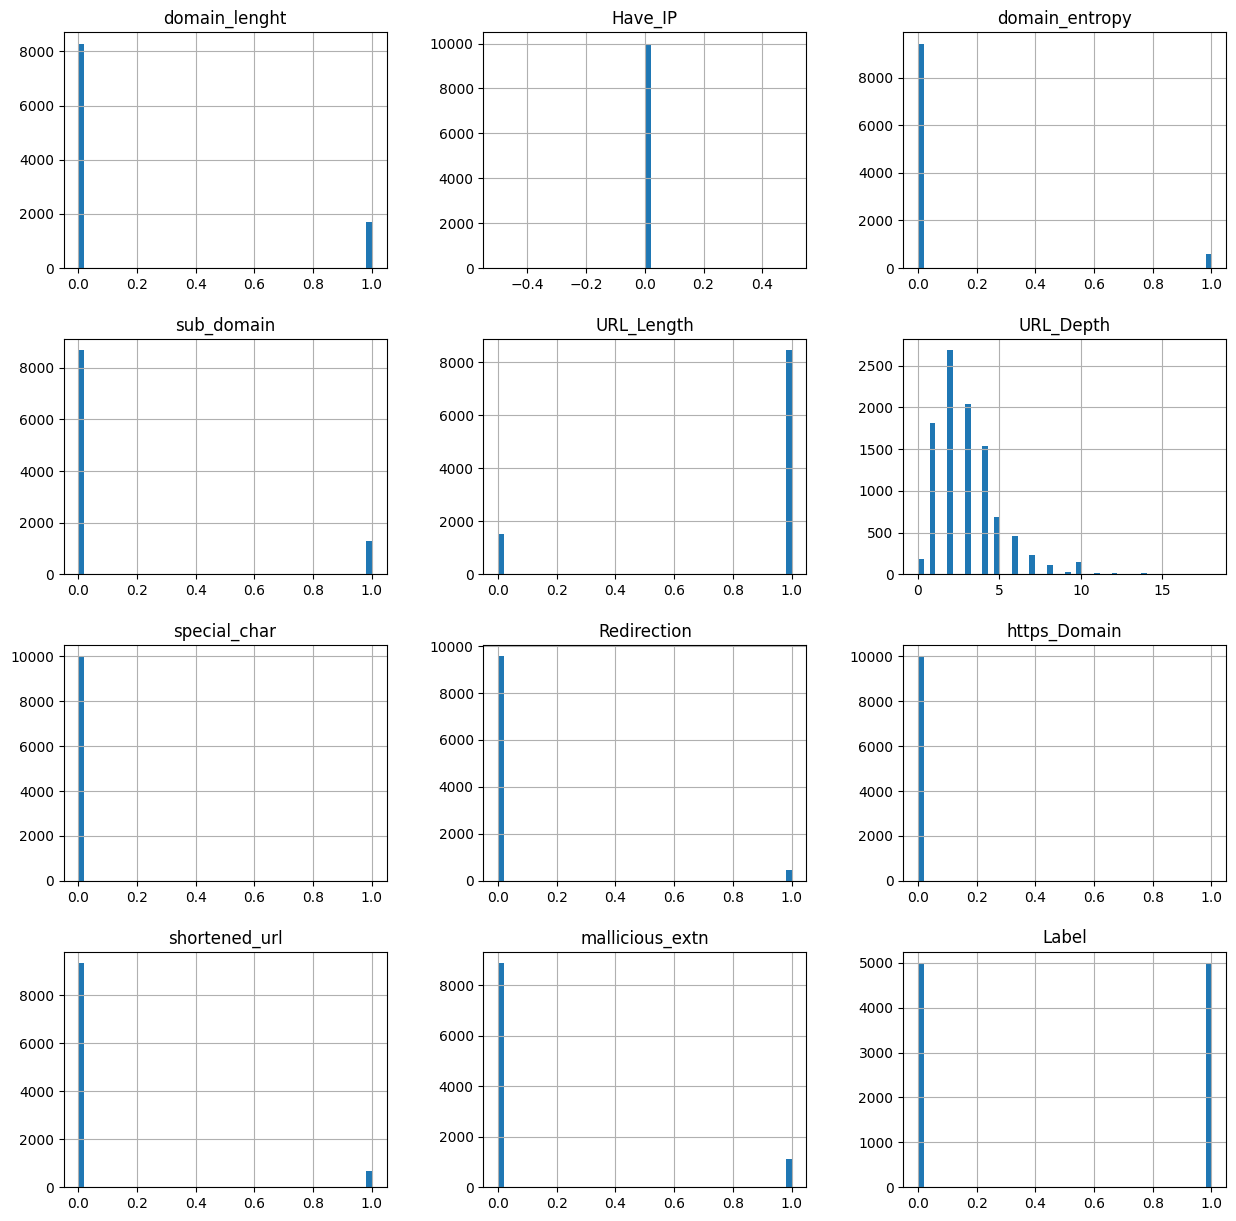

In [ ]:

data0.hist(bins = 50,figsize = (15,15))
plt.show()


#Correlation heatmap

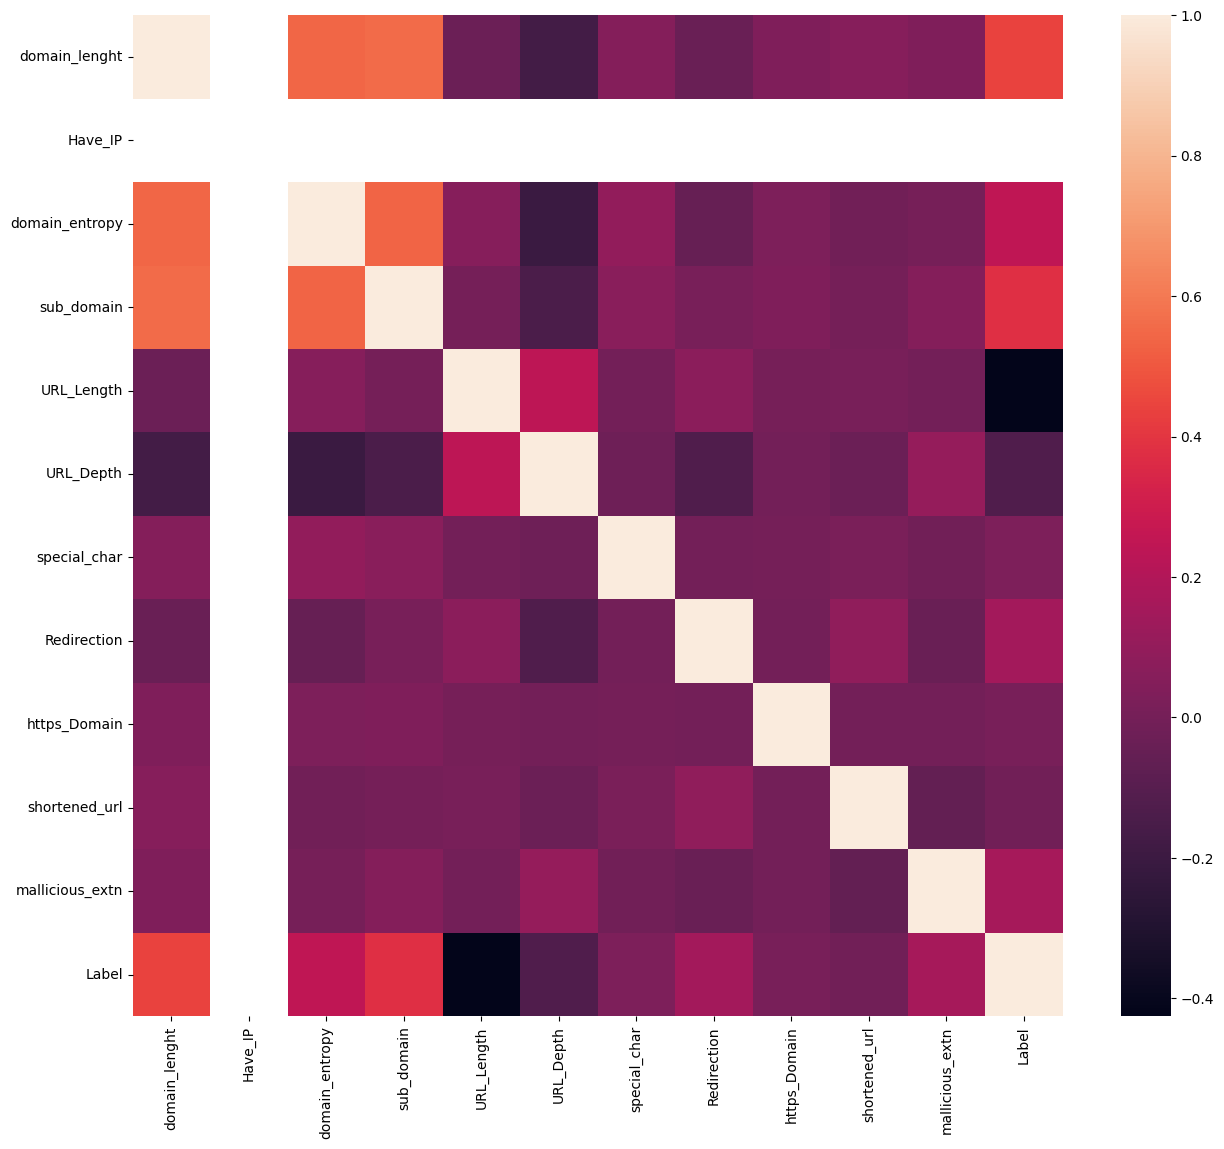

In [ ]:



plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

decription of data

In [ ]:

data0.describe()

,domain_lenght,Have_IP,domain_entropy,sub_domain,URL_Length,URL_Depth,special_char,Redirection,https_Domain,shortened_url,mallicious_extn,Label
count,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.17090,0.0,0.057000,0.131200,0.846600,3.071100,0.000900,0.044100,0.000200,0.066200,0.110900,0.500000
std,0.37644,0.0,0.231854,0.337636,0.360391,2.020162,0.029988,0.205328,0.014141,0.248644,0.314024,0.500025
min,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.0,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.00000,0.0,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.00000,0.0,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Sepratating & assigning features and target columns to X & y

In [ ]:

y = data0['Label']
X = data0.drop('Label',axis=1)
X.shape, y.shape

((10000, 11), (10000,))

# Splitting the dataset into train and test sets: 80-20 split

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape


((8000, 11), (2000, 11))

machine learning models

1.   Decision TREE
2.   Random forest
3.   knn
4.   svm
5.   Logistic regression

DEEP LEARNING
1.   RNN
2.   NEUTRAL NETWORKS

MODEL BOOSTERS

1.   Adaboost
2.   Xgbboost











In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


Decision tree


In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))


Decision Tree: Accuracy on training Data: 0.841
Decision Tree: Accuracy on test Data: 0.845


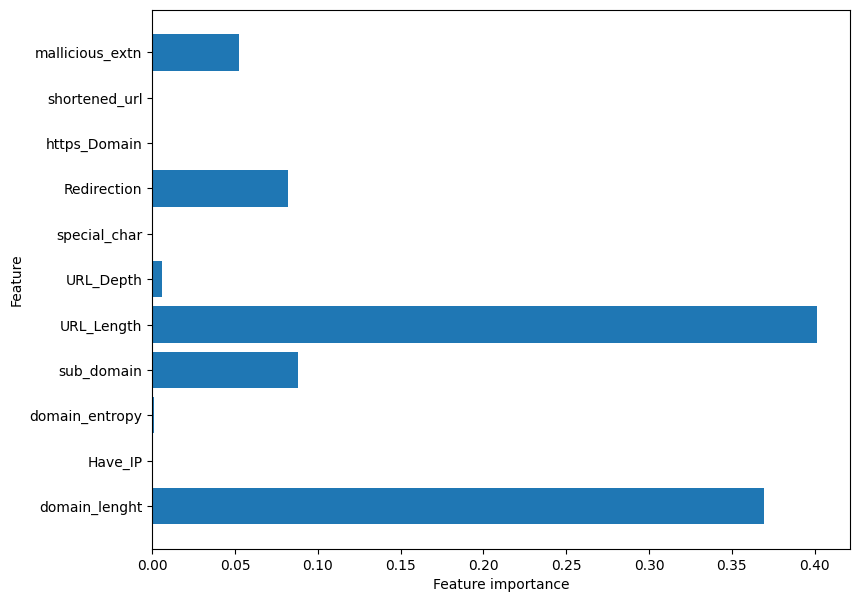

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

Random Forest model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


Random forest: Accuracy on training Data: 0.837
Random forest: Accuracy on test Data: 0.840


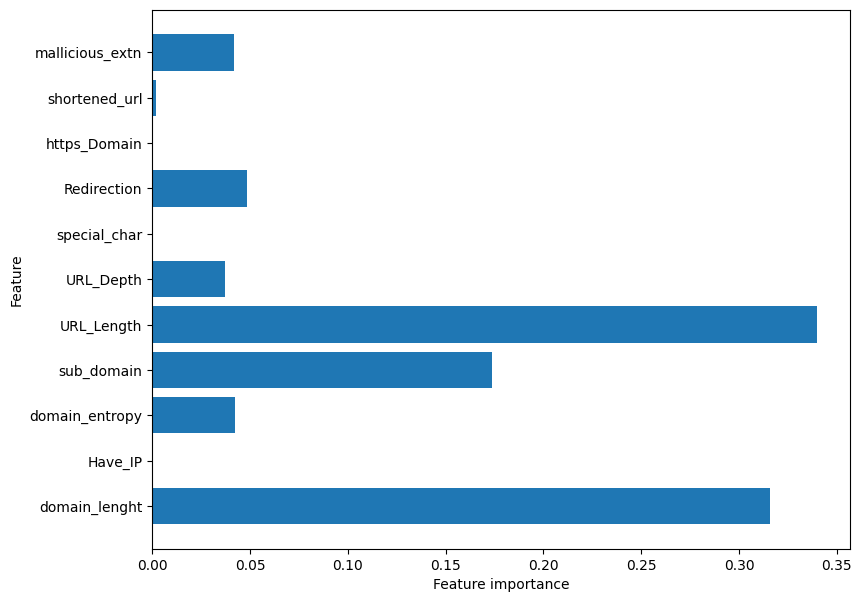

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

SVM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

y_test_svm = svm_classifier.predict(X_test)
y_train_svm = svm_classifier.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("svm: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("svm: Accuracy on test Data: {:.3f}".format(acc_test_svm))

svm: Accuracy on training Data: 0.840
svm: Accuracy on test Data: 0.844


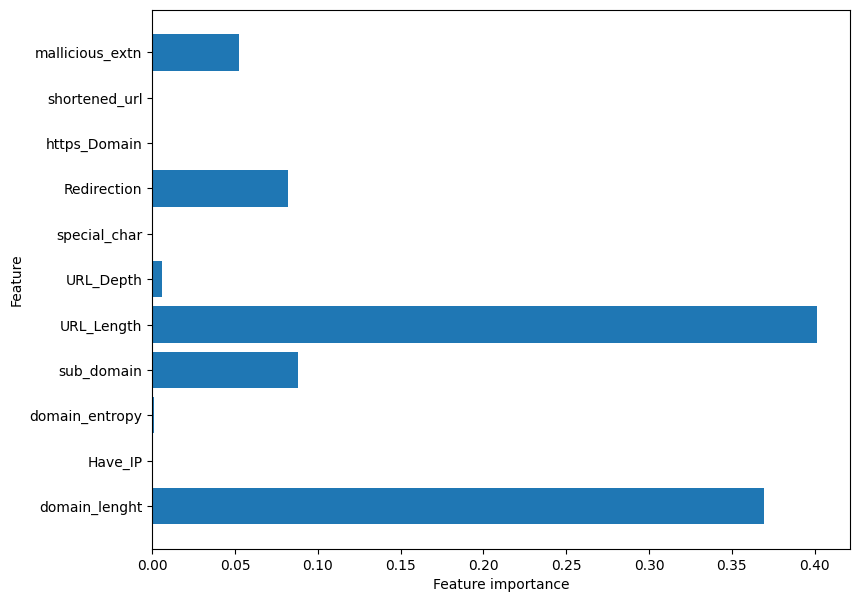

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('svm', acc_train_svm, acc_test_svm)

KNN

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a KNN classifier (adjust 'n_neighbors' as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_knn = knn_classifier.predict(X_test)
y_train_knn = knn_classifier.predict(X_train)

#computing the accuracy of the model performance
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("knn: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("knn: Accuracy on test Data: {:.3f}".format(acc_test_knn))

knn: Accuracy on training Data: 0.851
knn: Accuracy on test Data: 0.852


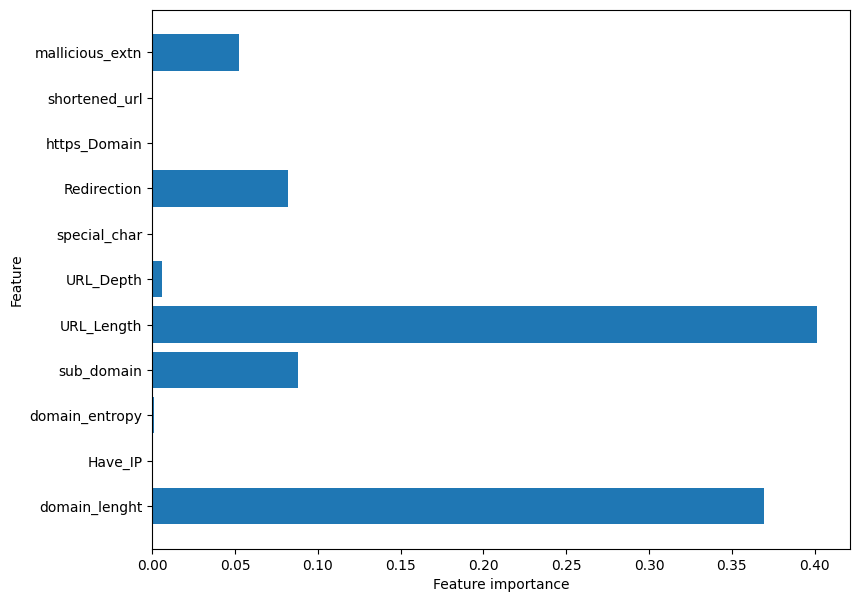

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('knn', acc_train_knn, acc_test_knn)

Naive bayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the Naive Bayes model on the training data
naive_bayes_classifier.fit(X_train, y_train)
y_test_nb = naive_bayes_classifier.predict(X_test)
y_train_nb = naive_bayes_classifier.predict(X_train)
#computing the accuracy of the model performance
acc_train_nb = accuracy_score(y_train,y_train_nb)
acc_test_nb = accuracy_score(y_test,y_test_nb)

print("naive bayes: Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("naive bayes: Accuracy on test Data: {:.3f}".format(acc_test_nb))



naive bayes: Accuracy on training Data: 0.813
naive bayes: Accuracy on test Data: 0.812


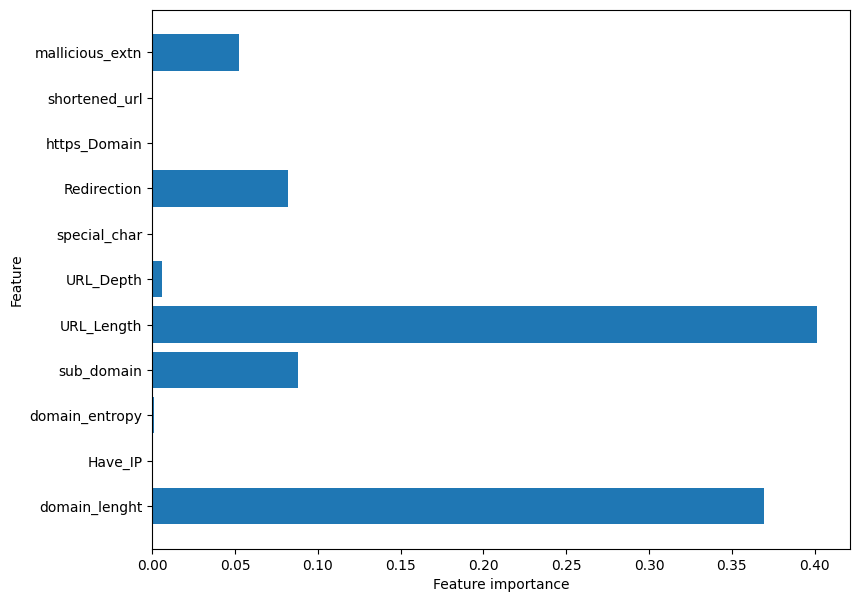

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()



In [ ]:
storeResults('naive bayes', acc_train_nb, acc_test_nb)

Logistic Regression

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_logistic = logistic_model.predict(X_test)
y_train_logistic = logistic_model.predict(X_train)
acc_train_logistic= accuracy_score(y_train,y_train_logistic)
acc_test_logistic = accuracy_score(y_test,y_test_logistic)

print("logistic: Accuracy on training Data: {:.3f}".format(acc_train_logistic))
print("logistic : Accuracy on test Data: {:.3f}".format(acc_test_logistic))


logistic: Accuracy on training Data: 0.854
logistic : Accuracy on test Data: 0.855


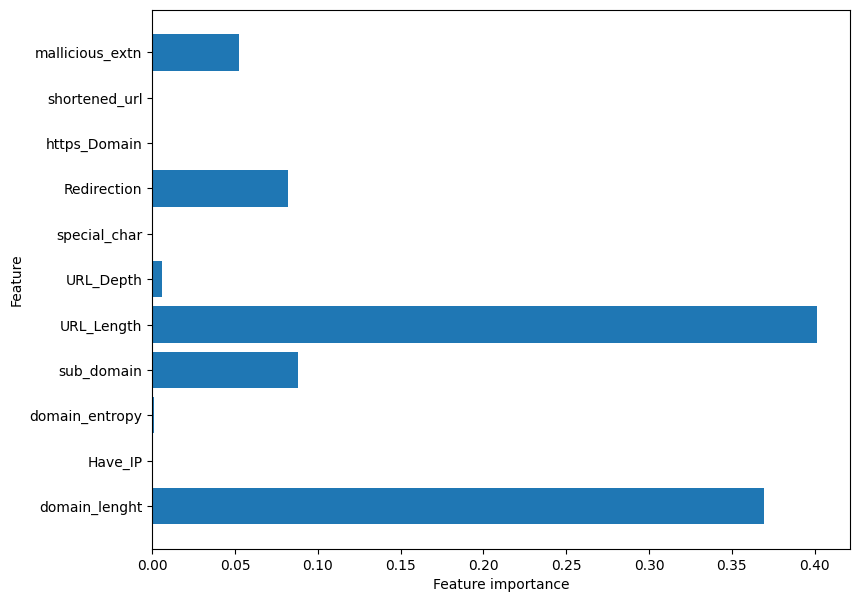

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
storeResults('logistic', acc_train_logistic, acc_test_logistic)

installing tensorflow

In [ ]:
pip install tensorflow

RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Instantiate the RNN model
model = Sequential()



# Add additional hidden layers (if needed)
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Adjust the number of units and activation as needed

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Fit the model to the training data
model.fit(X_train, y_train, epochs=10, batch_size=64)  # Adjust the number of epochs and batch size as needed
y_train_rnn = model.predict(X_train)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")



Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7956
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8419
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8491
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8515
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8524
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8536
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8526
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8544
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8525
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8565
T

NEUTRAL NETWORK

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Instantiate the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10)  # You can adjust the number of epochs as needed

# Predict on training and test data
y_train_nn = model.predict(X_train)
y_test_nn = model.predict(X_test)

# Convert predicted probabilities to binary class labels
y_train_nn_classes = (y_train_nn > 0.5).astype(np.int32)
y_test_nn_classes = (y_test_nn > 0.5).astype(np.int32)

# Calculate accuracy on training and test data
acc_train_nn = accuracy_score(y_train, y_train_nn_classes)
acc_test_nn = accuracy_score(y_test, y_test_nn_classes)

print("Neural Network: Accuracy on training data: {:.3f}".format(acc_train_nn))
print("Neural Network: Accuracy on test data: {:.3f}".format(acc_test_nn))






Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8263
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8460
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8496
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3604 - accuracy: 0.8521
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8504
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8519
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8504
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8525
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8543
Epoch 10/10
63/63 [==============================] - 0s 1ms/step
Neural Network: Accuracy on trainin

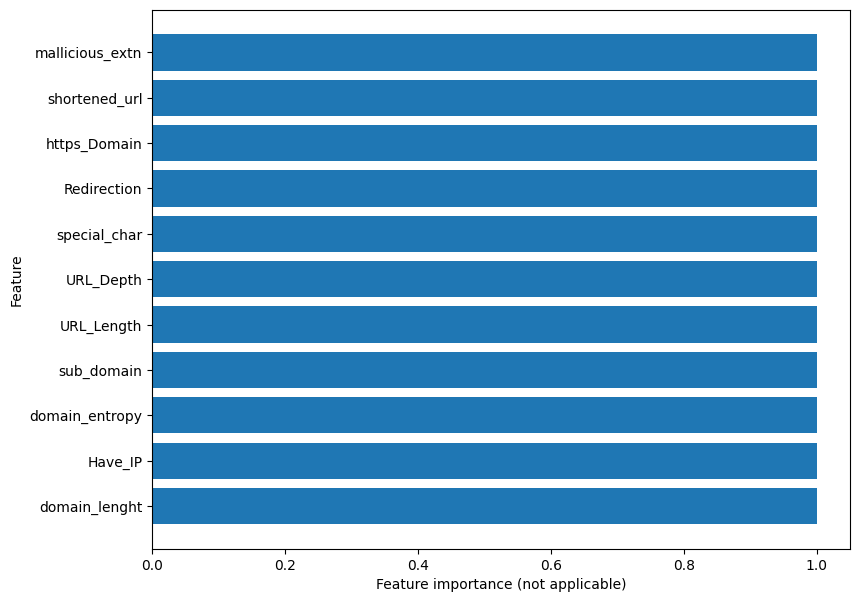

In [ ]:
# Plot feature importance (not directly applicable to neural networks, for illustrative purposes)
plt.figure(figsize=(9, 7))
n_features = X_train.shape[1]
plt.barh(range(n_features), [1] * n_features, align='center')  # Placeholder, as neural networks don't have feature importance like Random Forest
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance (not applicable)")
plt.ylabel("Feature")
plt.show()

In [ ]:
storeResults('neutral network', acc_train_nn, acc_test_nn)

AdaBoost

AdaBoost: Accuracy on training Data: 0.849
AdaBoost: Accuracy on test Data: 0.857


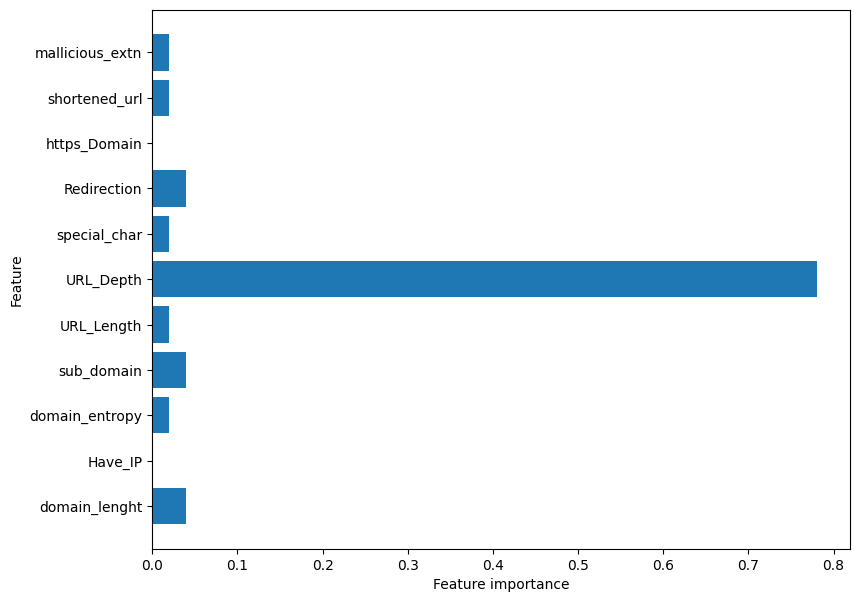

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Instantiate the AdaBoostClassifier model
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

# Fit the model to your training data
adaboost.fit(X_train, y_train)

# Predict the target values for the test and training data
y_test_adaboost = adaboost.predict(X_test)
y_train_adaboost = adaboost.predict(X_train)

# Compute the accuracy of the model performance
acc_train_adaboost = accuracy_score(y_train, y_train_adaboost)
acc_test_adaboost = accuracy_score(y_test, y_test_adaboost)

print("AdaBoost: Accuracy on training Data: {:.3f}".format(acc_train_adaboost))
print("AdaBoost: Accuracy on test Data: {:.3f}".format(acc_test_adaboost))

# Check feature importance in the model (if applicable)
# AdaBoost doesn't have a direct feature importance attribute like Random Forest
# You can create a similar plot using feature importances from base estimator
if hasattr(adaboost, 'estimators_') and hasattr(adaboost.estimators_[0], 'feature_importances_'):
    feature_importances = np.mean([tree.feature_importances_ for tree in adaboost.estimators_], axis=0)
    plt.figure(figsize=(9, 7))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), feature_importances, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
else:
    print("AdaBoost does not have a feature importance attribute.")


In [ ]:
storeResults('adaboost', acc_train_adaboost, acc_test_adaboost)


XGBoost Classification model

In [ ]:

from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))


XGBoost: Accuracy on training Data: 0.858
XGBoost : Accuracy on test Data: 0.863


In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

Comparing Models

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,adaboost,0.849,0.857
1,adaboost,0.849,0.857
2,neutral network,0.855,0.856
3,Decision Tree,0.841,0.845
4,Random Forest,0.837,0.840
5,svm,0.840,0.844
6,knn,0.851,0.852
7,naive bayes,0.813,0.812
8,logistic,0.854,0.854
9,neutral network,0.855,0.856


Sorting the datafram on accuracy

In [ ]:

results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
11,XGBoost,0.858,0.862
0,adaboost,0.849,0.857
1,adaboost,0.849,0.857
10,adaboost,0.849,0.857
2,neutral network,0.855,0.856
9,neutral network,0.855,0.856
8,logistic,0.854,0.854
6,knn,0.851,0.852
3,Decision Tree,0.841,0.845
5,svm,0.840,0.844


result == The XGboost gives heighest accuracy